In [11]:
import pandas as pd
import numpy as np

import torch
torch.cuda.empty_cache()

from fastai.vision.all import *

In [2]:
path = Path('../data')

In [3]:
cell_df = pd.read_csv(path/'cells_sample.csv')
cell_df.head()

,image_id,image_labels
0,0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0,0
1,6166673c-bbad-11e8-b2ba-ac1f6b6435d0,0
2,2533bcc2-bba5-11e8-b2ba-ac1f6b6435d0,0
3,280f88c2-bba5-11e8-b2ba-ac1f6b6435d0,0
4,13669cc6-bbaa-11e8-b2ba-ac1f6b6435d0,0


In [4]:
def get_x(r): return path/'train'/f"{r['image_id']}.png"
def get_y(r): return r['image_labels'].split('|')



def get_dls(bs: int, size: int):
    return DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                     splitter=RandomSplitter(seed=42),
                     get_x=get_x,
                     get_y=get_y,
                     batch_tfms=aug_transforms(size=size, min_scale=0.75))\
        .dataloaders(cell_df, bs=bs, num_workers=0)

In [5]:
batch_size = 64
image_size = 256

dls = get_dls(batch_size, image_size)

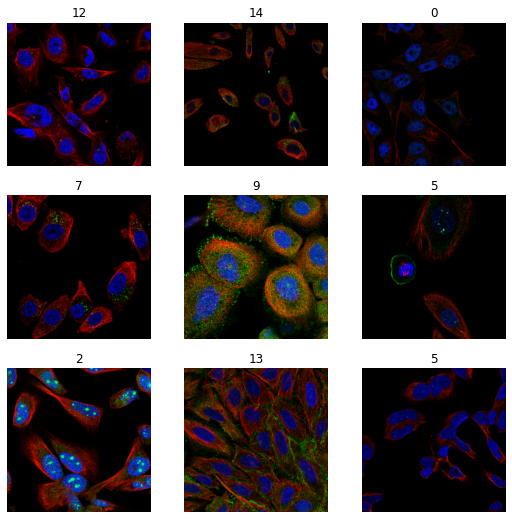

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.2))

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.033113110810518265)

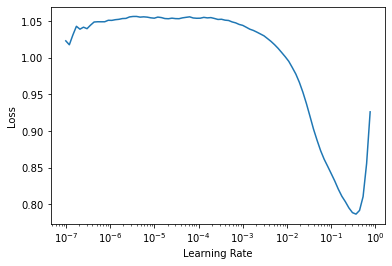

In [8]:
learn.lr_find()

In [10]:
with learn.no_bar():
    learn.fine_tune(10, base_lr=0.03)


[0, 0.470206081867218, 0.22089359164237976, 0.9055143594741821, '01:11']
[0, 0.20471911132335663, 0.19120660424232483, 0.909547746181488, '01:11']
[1, 0.18146422505378723, 0.18155817687511444, 0.9170854091644287, '01:11']
[2, 0.16853106021881104, 0.20867820084095, 0.9056136012077332, '01:12']
[3, 0.15626348555088043, 0.17074142396450043, 0.9238958358764648, '01:11']
[4, 0.14118286967277527, 0.14701054990291595, 0.9403596520423889, '01:11']
[5, 0.12813052535057068, 0.1673056185245514, 0.9267390370368958, '01:12']
[6, 0.11486388742923737, 0.13891391456127167, 0.9365909099578857, '01:11']
[7, 0.10170291364192963, 0.12003959715366364, 0.9490213990211487, '01:11']
[8, 0.09076198190450668, 0.11634797602891922, 0.9477652311325073, '01:12']
[9, 0.08218994736671448, 0.1183692142367363, 0.9463436007499695, '01:13']
